In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
import tensorflow as tf
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1, )
y_test =y_test.reshape(-1, )

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

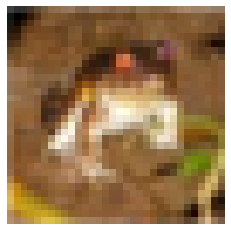

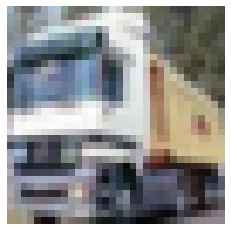

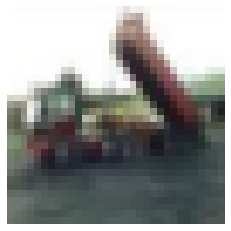

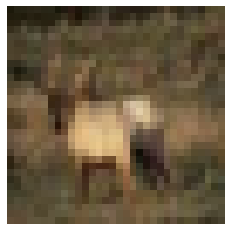

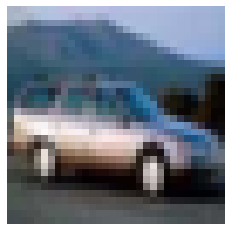

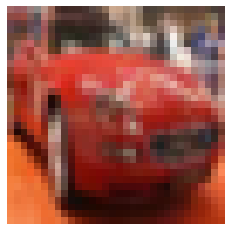

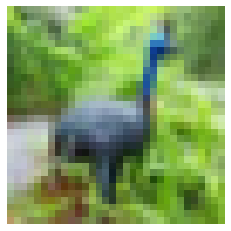

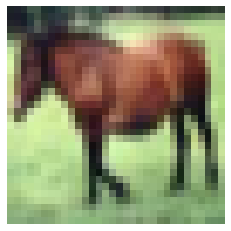

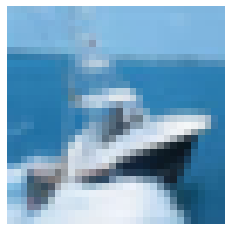

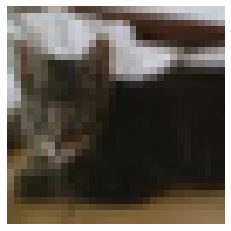

In [9]:
for i in range(10):
  plt.axis('off')
  plt.imshow(x_train[i])
  plt.show()

In [10]:
model = models.Sequential([
                         
                         layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same'),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         layers.BatchNormalization(),
                         layers.MaxPool2D(pool_size=2, strides=2),
                         layers.Dropout(0.3),
                         

                         layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                         layers.BatchNormalization(),
                         layers.MaxPool2D(pool_size=2, strides=2),
                         layers.Dropout(0.4),
                         

                         layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                         layers.BatchNormalization(),
                         layers.MaxPool2D(pool_size=2, strides=2),
                         layers.Dropout(0.5),
                         
                         layers.Flatten(),

                         layers.Dense(units=512, activation='relu'),
                         layers.Dense(units=256, activation='relu'),
                         layers.Dense(units=10, activation='softmax'),

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early = EarlyStopping(monitor='val_loss',
                      patience=4,
                      verbose=1,
                      restore_best_weights=True)
filepath='model.h5'
check = ModelCheckpoint(filepath,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              patience=3,
                              factor=0.2,
                              min_delta=0.00001,
                              verbose=1)

callback = [early, check, reduce_lr]

bs = 128
training_sample = len(x_train)
validation_sample = len(x_test)

model_history = model.fit(x_train, y_train, 
                          batch_size= bs, 
                          validation_data=(x_test, y_test), 
                          epochs=100, 
                          callbacks=callback,
                          steps_per_epoch=training_sample // bs, 
                          validation_steps= validation_sample // bs
                          )

Epoch 1/100
390/390 [==============================] - 26s 18ms/step - loss: 1.8409 - acc: 0.3569 - val_loss: 2.4786 - val_acc: 0.2718

Epoch 00001: val_loss improved from inf to 2.47861, saving model to model.h5
Epoch 2/100
390/390 [==============================] - 6s 16ms/step - loss: 1.1625 - acc: 0.5810 - val_loss: 0.9206 - val_acc: 0.6686

Epoch 00002: val_loss improved from 2.47861 to 0.92061, saving model to model.h5
Epoch 3/100
390/390 [==============================] - 6s 16ms/step - loss: 0.9445 - acc: 0.6606 - val_loss: 0.9515 - val_acc: 0.6713

Epoch 00003: val_loss did not improve from 0.92061
Epoch 4/100
390/390 [==============================] - 6s 16ms/step - loss: 0.8287 - acc: 0.7022 - val_loss: 0.7909 - val_acc: 0.7254

Epoch 00004: val_loss improved from 0.92061 to 0.79095, saving model to model.h5
Epoch 5/100
390/390 [==============================] - 6s 15ms/step - loss: 0.7431 - acc: 0.7362 - val_loss: 0.7058 - val_acc: 0.7535

Epoch 00005: val_loss improved fro

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4866 - acc: 0.8456


[0.4865932762622833, 0.8456000089645386]

In [13]:
History = pd.DataFrame(model_history.history)
History.head()

,loss,acc,val_loss,val_acc,lr
0,1.534549,0.443730,2.478612,0.271835,0.001
1,1.100303,0.602984,0.920606,0.668570,0.001
2,0.922077,0.669594,0.951469,0.671274,0.001
3,0.811257,0.711100,0.790946,0.725361,0.001
4,0.738531,0.736967,0.705824,0.753506,0.001


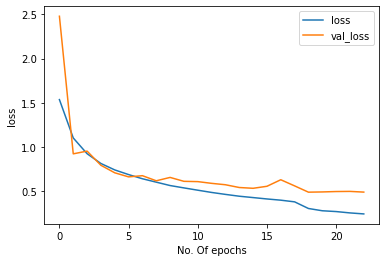

In [14]:
History[['loss', 'val_loss']].plot()
plt.ylabel('loss')
plt.xlabel('No. Of epochs')
plt.show()

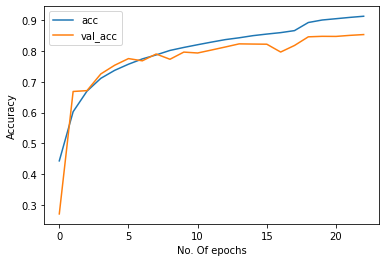

In [16]:
History[['acc', 'val_acc']].plot()
plt.ylabel('Accuracy')
plt.xlabel('No. Of epochs')
plt.show()

In [17]:
y_pred = model.predict(x_test)
y_pred  = [np.argmax(j) for j in y_pred]
y_pred[:5], y_test[:5]

([3, 8, 8, 0, 6], array([3, 8, 8, 0, 6], dtype=uint8))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.92      0.92      0.92      1000
           2       0.82      0.74      0.78      1000
           3       0.71      0.71      0.71      1000
           4       0.82      0.83      0.83      1000
           5       0.79      0.77      0.78      1000
           6       0.86      0.89      0.88      1000
           7       0.88      0.89      0.88      1000
           8       0.90      0.93      0.91      1000
           9       0.89      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Accuracy is :  0.8456


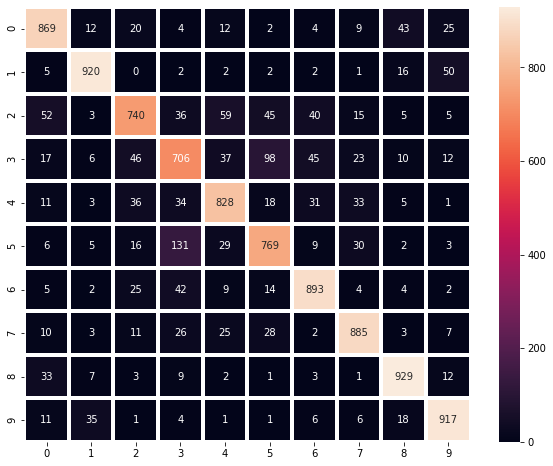

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred))
print('Accuracy is : ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, lw=3, fmt='d')
plt.show()